In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [231]:
# Import Module 
import os 

# Folder Path 
path = r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A1/A1_data/review_polarity/txt_sentoken/pos'

# Change the directory 
os.chdir(path) 

# Read text File 
def read_text_file(file_path): 
    with open(file_path, 'r') as f: 
        return f.read().splitlines()  

# iterate through all file 
collection_of_data_pos = []
for file in os.listdir(): 
    # Check whether file is in text format or not 
    if file.endswith(".txt"): 
        file_path = f"{path}/{file}"
        # call read text file function 
        collection_of_data_pos = collection_of_data_pos + read_text_file(file_path)

In [232]:
df_pos = pd.DataFrame(collection_of_data_pos, columns = ['review'])
df_pos['sentiment'] = 'positive'

In [233]:
# Folder Path 
path = r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A1/A1_data/review_polarity/txt_sentoken/neg'

# Change the directory 
os.chdir(path)   

# iterate through all file 
collection_of_data_neg = []
for file in os.listdir(): 
    # Check whether file is in text format or not 
    if file.endswith(".txt"): 
        file_path = f"{path}/{file}"
        # call read text file function 
        collection_of_data_neg = collection_of_data_neg + read_text_file(file_path)

In [234]:
df_neg = pd.DataFrame(collection_of_data_neg, columns = ['review'])
df_neg['sentiment'] = 'negative'

In [235]:
#both the dataframe of positive and negative reviews are concatinated to one dataframe named 'collection_of_data'
df_pos_neg = [df_pos, df_neg]
Collection_of_data = pd.concat(df_pos_neg)
#Shuffle the columns of the data
movie_reviews= Collection_of_data.sample(frac=1).reset_index(drop=True)
movie_reviews

,review,sentiment
0,the coens also add plenty of quirky touches th...,positive
1,"the only exception is rob schneider , who is a...",negative
2,"from the bumbling jar jar , to a one-man , two...",positive
3,( note : there are spoilers regarding the fil...,positive
4,"seven years ago , his first book was a hit .",positive
...,...,...
64715,the characters just wander around the city aim...,negative
64716,"wait a minute "" .",negative
64717,"she's great to look at , and she can certainly...",positive
64718,"mcconaughey is then drafted in as his lawyer ,...",negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

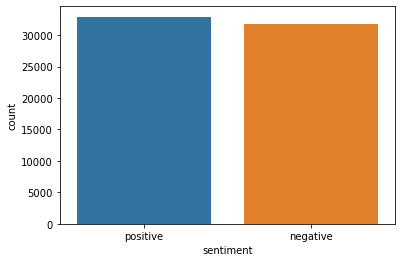

In [236]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [237]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [238]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [239]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [240]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

# 0.25 x 0.8 = 0.2

In [242]:
len(X_val)

12944

# Preparing the Embedding Layer

In [243]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_val= tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)

In [244]:
len(X_train)

38832

In [245]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val=pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [246]:
X_train[3]

array([2570,    5, 3228,    4, 1601,  144, 1493,    7, 3007,   17,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [247]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/Users/nehakardam/Documents/UWclasses /CSE NLP/A4/glove.6B.100d.txt', encoding="utf8")


for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:])
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [248]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [249]:
len(embedding_matrix)

32331

# Text Classification with Simple Neural Network

In [250]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [251]:
vocab_size

32331

In [252]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          3233100   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 10001     
Total params: 3,243,101
Trainable params: 10,001
Non-trainable params: 3,233,100
_________________________________________________________________
None


In [253]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1)

Epoch 1/6
304/304 [==============================] - 1s 2ms/step - loss: 0.6854 - acc: 0.5638
Epoch 2/6
304/304 [==============================] - 1s 2ms/step - loss: 0.6579 - acc: 0.6058
Epoch 3/6
304/304 [==============================] - 1s 3ms/step - loss: 0.6472 - acc: 0.6204
Epoch 4/6
304/304 [==============================] - 1s 2ms/step - loss: 0.6397 - acc: 0.6284
Epoch 5/6
304/304 [==============================] - 1s 3ms/step - loss: 0.6342 - acc: 0.6357
Epoch 6/6
304/304 [==============================] - 1s 3ms/step - loss: 0.6311 - acc: 0.6370


In [254]:
history2 = model.fit(X_val, y_val, batch_size=128, epochs=6, verbose=1)

Epoch 1/6
102/102 [==============================] - 0s 2ms/step - loss: 0.6867 - acc: 0.5864
Epoch 2/6
102/102 [==============================] - 0s 2ms/step - loss: 0.6538 - acc: 0.6170
Epoch 3/6
102/102 [==============================] - 0s 2ms/step - loss: 0.6355 - acc: 0.6342
Epoch 4/6
102/102 [==============================] - 0s 3ms/step - loss: 0.6245 - acc: 0.6465
Epoch 5/6
102/102 [==============================] - 0s 3ms/step - loss: 0.6112 - acc: 0.6592
Epoch 6/6
102/102 [==============================] - 0s 3ms/step - loss: 0.6041 - acc: 0.6692


In [255]:
score = model.evaluate(X_test, y_test, verbose=1)

405/405 [==============================] - 0s 700us/step - loss: 0.6953 - acc: 0.5826


In [299]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.714830756187439
Test Accuracy: 0.6141068935394287


# Text Classification with a Convolutional Neural Network

In [257]:
from keras.layers.convolutional import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [258]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          3233100   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 3,297,357
Trainable params: 64,257
Non-trainable params: 3,233,100
_________________________________________________________________
None


In [259]:
history_1 = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1)


Epoch 1/6
304/304 [==============================] - 9s 29ms/step - loss: 0.6719 - acc: 0.5866
Epoch 2/6
304/304 [==============================] - 9s 31ms/step - loss: 0.6227 - acc: 0.6546
Epoch 3/6
304/304 [==============================] - 10s 33ms/step - loss: 0.5876 - acc: 0.6918
Epoch 4/6
304/304 [==============================] - 9s 31ms/step - loss: 0.5519 - acc: 0.7213
Epoch 5/6
304/304 [==============================] - 7s 22ms/step - loss: 0.5069 - acc: 0.7613
Epoch 6/6
304/304 [==============================] - 7s 21ms/step - loss: 0.4673 - acc: 0.7871


In [260]:
history_2 = model.fit(X_val, y_val, batch_size=128, epochs=6, verbose=1)


Epoch 1/6
102/102 [==============================] - 2s 22ms/step - loss: 0.6817 - acc: 0.6148
Epoch 2/6
102/102 [==============================] - 2s 22ms/step - loss: 0.5544 - acc: 0.7184
Epoch 3/6
102/102 [==============================] - 2s 22ms/step - loss: 0.4957 - acc: 0.7685
Epoch 4/6
102/102 [==============================] - 2s 21ms/step - loss: 0.4436 - acc: 0.8123
Epoch 5/6
102/102 [==============================] - 2s 22ms/step - loss: 0.4061 - acc: 0.8422
Epoch 6/6
102/102 [==============================] - 2s 22ms/step - loss: 0.3575 - acc: 0.8816


In [261]:
score = model.evaluate(X_test, y_test, verbose=1)

405/405 [==============================] - 1s 2ms/step - loss: 0.7148 - acc: 0.6141


In [262]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.714830756187439
Test Accuracy: 0.6141068935394287


In [263]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])


# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

In [264]:
f1_score

0.535704493522644

In [265]:
precision

0.6926972270011902

In [266]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

203/203 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.65      6286
           1       0.00      0.00      0.00      6658

    accuracy                           0.49     12944
   macro avg       0.24      0.50      0.33     12944
weighted avg       0.24      0.49      0.32     12944



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [291]:
# Fine Tuning Example, classification VGG16 with CIFAR 10, we import the necessary libraries
import tensorflow as tf
from keras import callbacks
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Instantiate an optimizer.
from tensorflow.keras import layers


In [325]:
model.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=['acc',f1_m,precision_m, recall_m])

AttributeError: module 'keras.optimizers' has no attribute 'SGD'

In [318]:

model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),metrics=["accuracy"])